# Spectroscopic line data 

ArchNEMESIS includes a reference class to operate with spectroscopic line data from databases such as [HITRAN](https://hitran.org/). Specifically, the attributes of the LineData class include the information required to calculate the line-by-line cross sections at arbitrary pressures and temperatures (e.g., line strengths, broadening coefficiencts, partition functions, etc). In addition, this class includes methods to download line-by-line data and partition functions from online backends, as well as methods to filter and process this data.

Currently only HITRANonline is implemented as an online backend, and these capabilities rely upon the [HITRAN Application Programming Interface (HAPI)](https://hitran.org/hapi/) Python library, which in turn uses partition functions from TIPS [(Gamache et al., 2021)](https://doi.org/10.1016/j.jqsrt.2021.107713).

In this notebook, we provide some examples showing how archNEMESIS can be used to process the spectroscopic line data.

In [7]:
# First we need to import the archnemesis package
import archnemesis as ans

## 1. Getting started immediately

Unless otherwise specified, an instance of the `LineData_0` class uses HITRANonline as its backend. The below code shows how to create a `LineData_0` instance for a specific gas isotope (using the default online backend), download some data, and display some diagnostic plots.

In [8]:
# Inputs are RADTRAN ID numbers
gas_id = ans.enums.Gas.H2O
iso_id = 4

# Create LineData_0 instance
linedata = ans.LineData_0(gas_id, iso_id)

INFO :: LINE_DATABASE :: LineData_0.py-192 :: Using default line database HITRAN(instance_id=126162595004816, local_storage_dir=/home/dobinsonl/repos/archnemesis-dist/docs/examples/linedata/local_non_default_line_database)
INFO :: PARTITION_FUNCTION_DATABASE :: LineData_0.py-207 :: Using default partition function database HITRAN(instance_id=126162595005776, local_storage_dir=None)


In [9]:
# Download line data for a specified wavelength range
vmin = 2000 # wavenumber (cm^{-1})
vmax = 4000 # wavenumber (cm^{-1})

linedata.fetch_linedata(vmin, vmax)

# Download partition function tables for the gas isotopes
linedata.fetch_partition_function()

DEBUG :: _fetch_line_data :: hitran.py-402 :: Downloaded gas data (RadtranGasDescriptor(gas_id=<Gas.H2O: 1>, iso_id=7), <AmbientGas.AIR: 0>) DOES NOT CONTAIN desired wave range None vs WaveRange(min=2750, max=3250, unit=<WaveUnit.Wavenumber_cm: 0>)
INFO :: _fetch_line_data :: hitran.py-407 :: Downloading data for (RadtranGasDescriptor(gas_id=<Gas.H2O: 1>, iso_id=7), <AmbientGas.AIR: 0>) where wave_range=WaveRange(min=2750, max=3250, unit=<WaveUnit.Wavenumber_cm: 0>) (saved_wave_range=None)...
DEBUG :: _fetch_line_data :: hitran.py-424 :: Fetching the following parameters from HITRAN: ('nu', 'sw', 'a', 'gamma_air', 'n_air', 'delta_air', 'gamma_self', 'n_self', 'elower', 'n_air')
INFO :: _fetch_line_data :: hitran.py-452 :: Data downloaded.
DEBUG :: _fetch_line_data :: hitran.py-402 :: Downloaded gas data (RadtranGasDescriptor(gas_id=<Gas.H2O: 1>, iso_id=4), <AmbientGas.AIR: 0>) DOES NOT CONTAIN desired wave range WaveRange(min=2000, max=3250, unit=<WaveUnit.Wavenumber_cm: 0>) vs WaveRan

DEBUG :: line_data_dict :: LineData_0.py-229 :: self.line_data.RT_GAS_DESC.dtype=dtype('int64')
DEBUG :: line_data_dict :: LineData_0.py-230 :: self.line_data.RT_GAS_DESC.shape=(12454, 2)
DEBUG :: line_data_dict :: LineData_0.py-231 :: self.line_data.RT_GAS_DESC=array([[1, 4],
       [1, 4],
       [1, 4],
       ...,
       [1, 4],
       [1, 4],
       [1, 4]])
DEBUG :: line_data_dict :: LineData_0.py-235 :: len(self.get_line_data_gas_desc_mask(rt_gas_desc))=12454
DEBUG :: line_data_dict :: LineData_0.py-236 :: type(self.get_line_data_gas_desc_mask(rt_gas_desc))=<class 'numpy.ndarray'>
DEBUG :: line_data_dict :: LineData_0.py-237 :: self.get_line_data_gas_desc_mask(rt_gas_desc).dtype=dtype('bool')
DEBUG :: line_data_dict :: LineData_0.py-238 :: np.count_nonzero(self.get_line_data_gas_desc_mask(rt_gas_desc))=12454


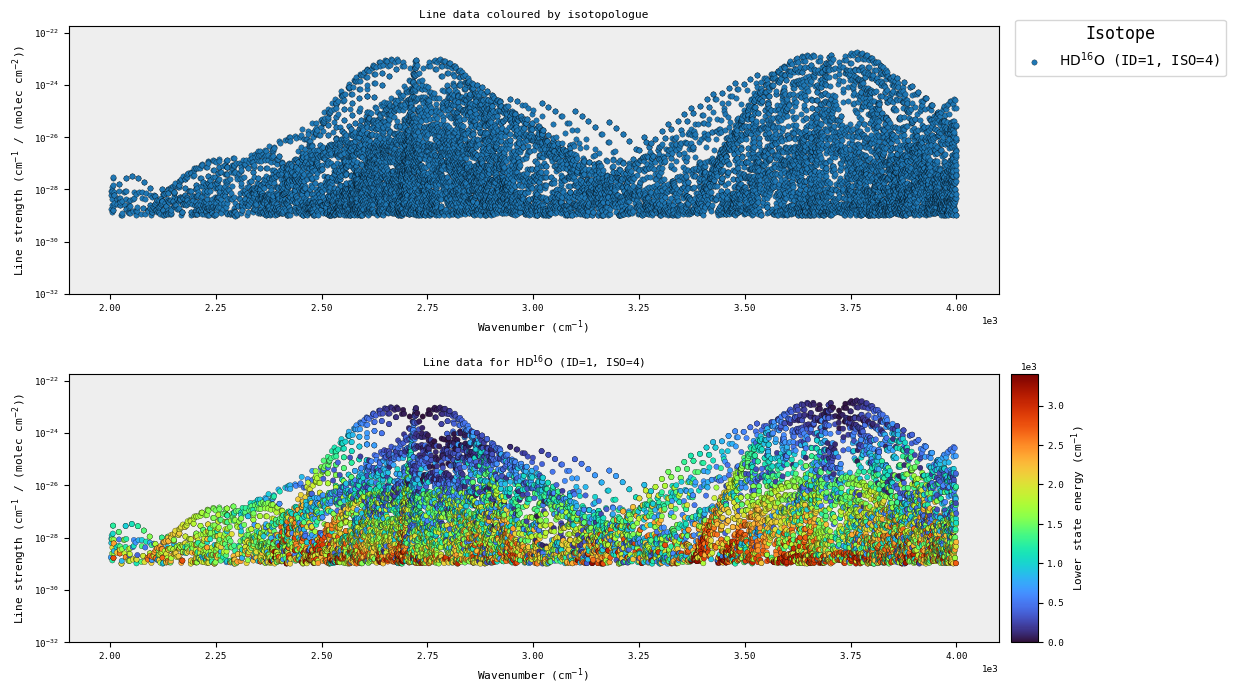

In [10]:
# Create diagnotic plots
linedata.plot_linedata()

## 2. Specifying a database.

A database can be passed to the constructor of a `LineData_0` instance, enabling you to define in which folder you want to place the database. All online backends have the same interface, so once other choices than HITRAN are available the same method should still work. 

NOTE: HAPI has a few quirks that mean it is not quite as simple as it should be to alter databases during a single JUPYTER session, in the background there is only ever **one** HAPI database. Therefore all existing HITRAN databases need to use the same folder or strange things can happen. To be safe, explicity purge a HITRAN database if you want to change the folder it lives in during a single interpreter session. I am working on a "hold" and "release" state for them so the location can be changed during an interpreter session without deleting data but it is not quite ready yet.

In [11]:
# HITRAN only: purge the previously created database as we want to change where it is stored for this demonstration
linedata.LINE_DATABASE.purge()

# Import the database class
from archnemesis.database.line_database.hitran import HITRAN

# Create a new LineData_0 instance with a non-default database 
linedata = ans.LineData_0(
	ans.enums.Gas.H2O, # Same gas
	0, # All isotopes
	LINE_DATABASE=HITRAN('local_non_default_line_database') # Different database location
)

INFO :: purge :: hitran.py-244 :: Database HITRAN(instance_id=126162595004816, local_storage_dir=/home/dobinsonl/repos/archnemesis-dist/docs/examples/linedata/local_non_default_line_database) has been purged. It no longer holds any local data and must be re-initialised using `self.init_database(...)`.
INFO :: retrieve_downloaded_gas_wavenumber_interval_from_cache :: hitran.py-289 :: Cache file for `self._downloaded_gas_wavenumber_interval` not found at cache_file_path='/home/dobinsonl/repos/archnemesis-dist/docs/examples/linedata/local_non_default_line_database/downloaded_gas_wavenumber_interval.pkl'. This is not a problem if the database is being built from scratch.
DEBUG :: init_database :: hitran.py-326 :: tablenames=[]
INFO :: init_database :: hitran.py-363 :: Database HITRAN(instance_id=126162836063808, local_storage_dir=/home/dobinsonl/repos/archnemesis-dist/docs/examples/linedata/local_non_default_line_database) initialised.
INFO :: PARTITION_FUNCTION_DATABASE :: LineData_0.py-2

DEBUG :: _fetch_line_data :: hitran.py-402 :: Downloaded gas data (RadtranGasDescriptor(gas_id=<Gas.H2O: 1>, iso_id=1), <AmbientGas.AIR: 0>) DOES NOT CONTAIN desired wave range None vs WaveRange(min=2750, max=3250, unit=<WaveUnit.Wavenumber_cm: 0>)
INFO :: _fetch_line_data :: hitran.py-407 :: Downloading data for (RadtranGasDescriptor(gas_id=<Gas.H2O: 1>, iso_id=1), <AmbientGas.AIR: 0>) where wave_range=WaveRange(min=2750, max=3250, unit=<WaveUnit.Wavenumber_cm: 0>) (saved_wave_range=None)...
DEBUG :: _fetch_line_data :: hitran.py-424 :: Fetching the following parameters from HITRAN: ('nu', 'sw', 'a', 'gamma_air', 'n_air', 'delta_air', 'gamma_self', 'n_self', 'elower', 'n_air')
INFO :: _fetch_line_data :: hitran.py-452 :: Data downloaded.
DEBUG :: _fetch_line_data :: hitran.py-402 :: Downloaded gas data (RadtranGasDescriptor(gas_id=<Gas.H2O: 1>, iso_id=2), <AmbientGas.AIR: 0>) DOES NOT CONTAIN desired wave range None vs WaveRange(min=2750, max=3250, unit=<WaveUnit.Wavenumber_cm: 0>)
IN

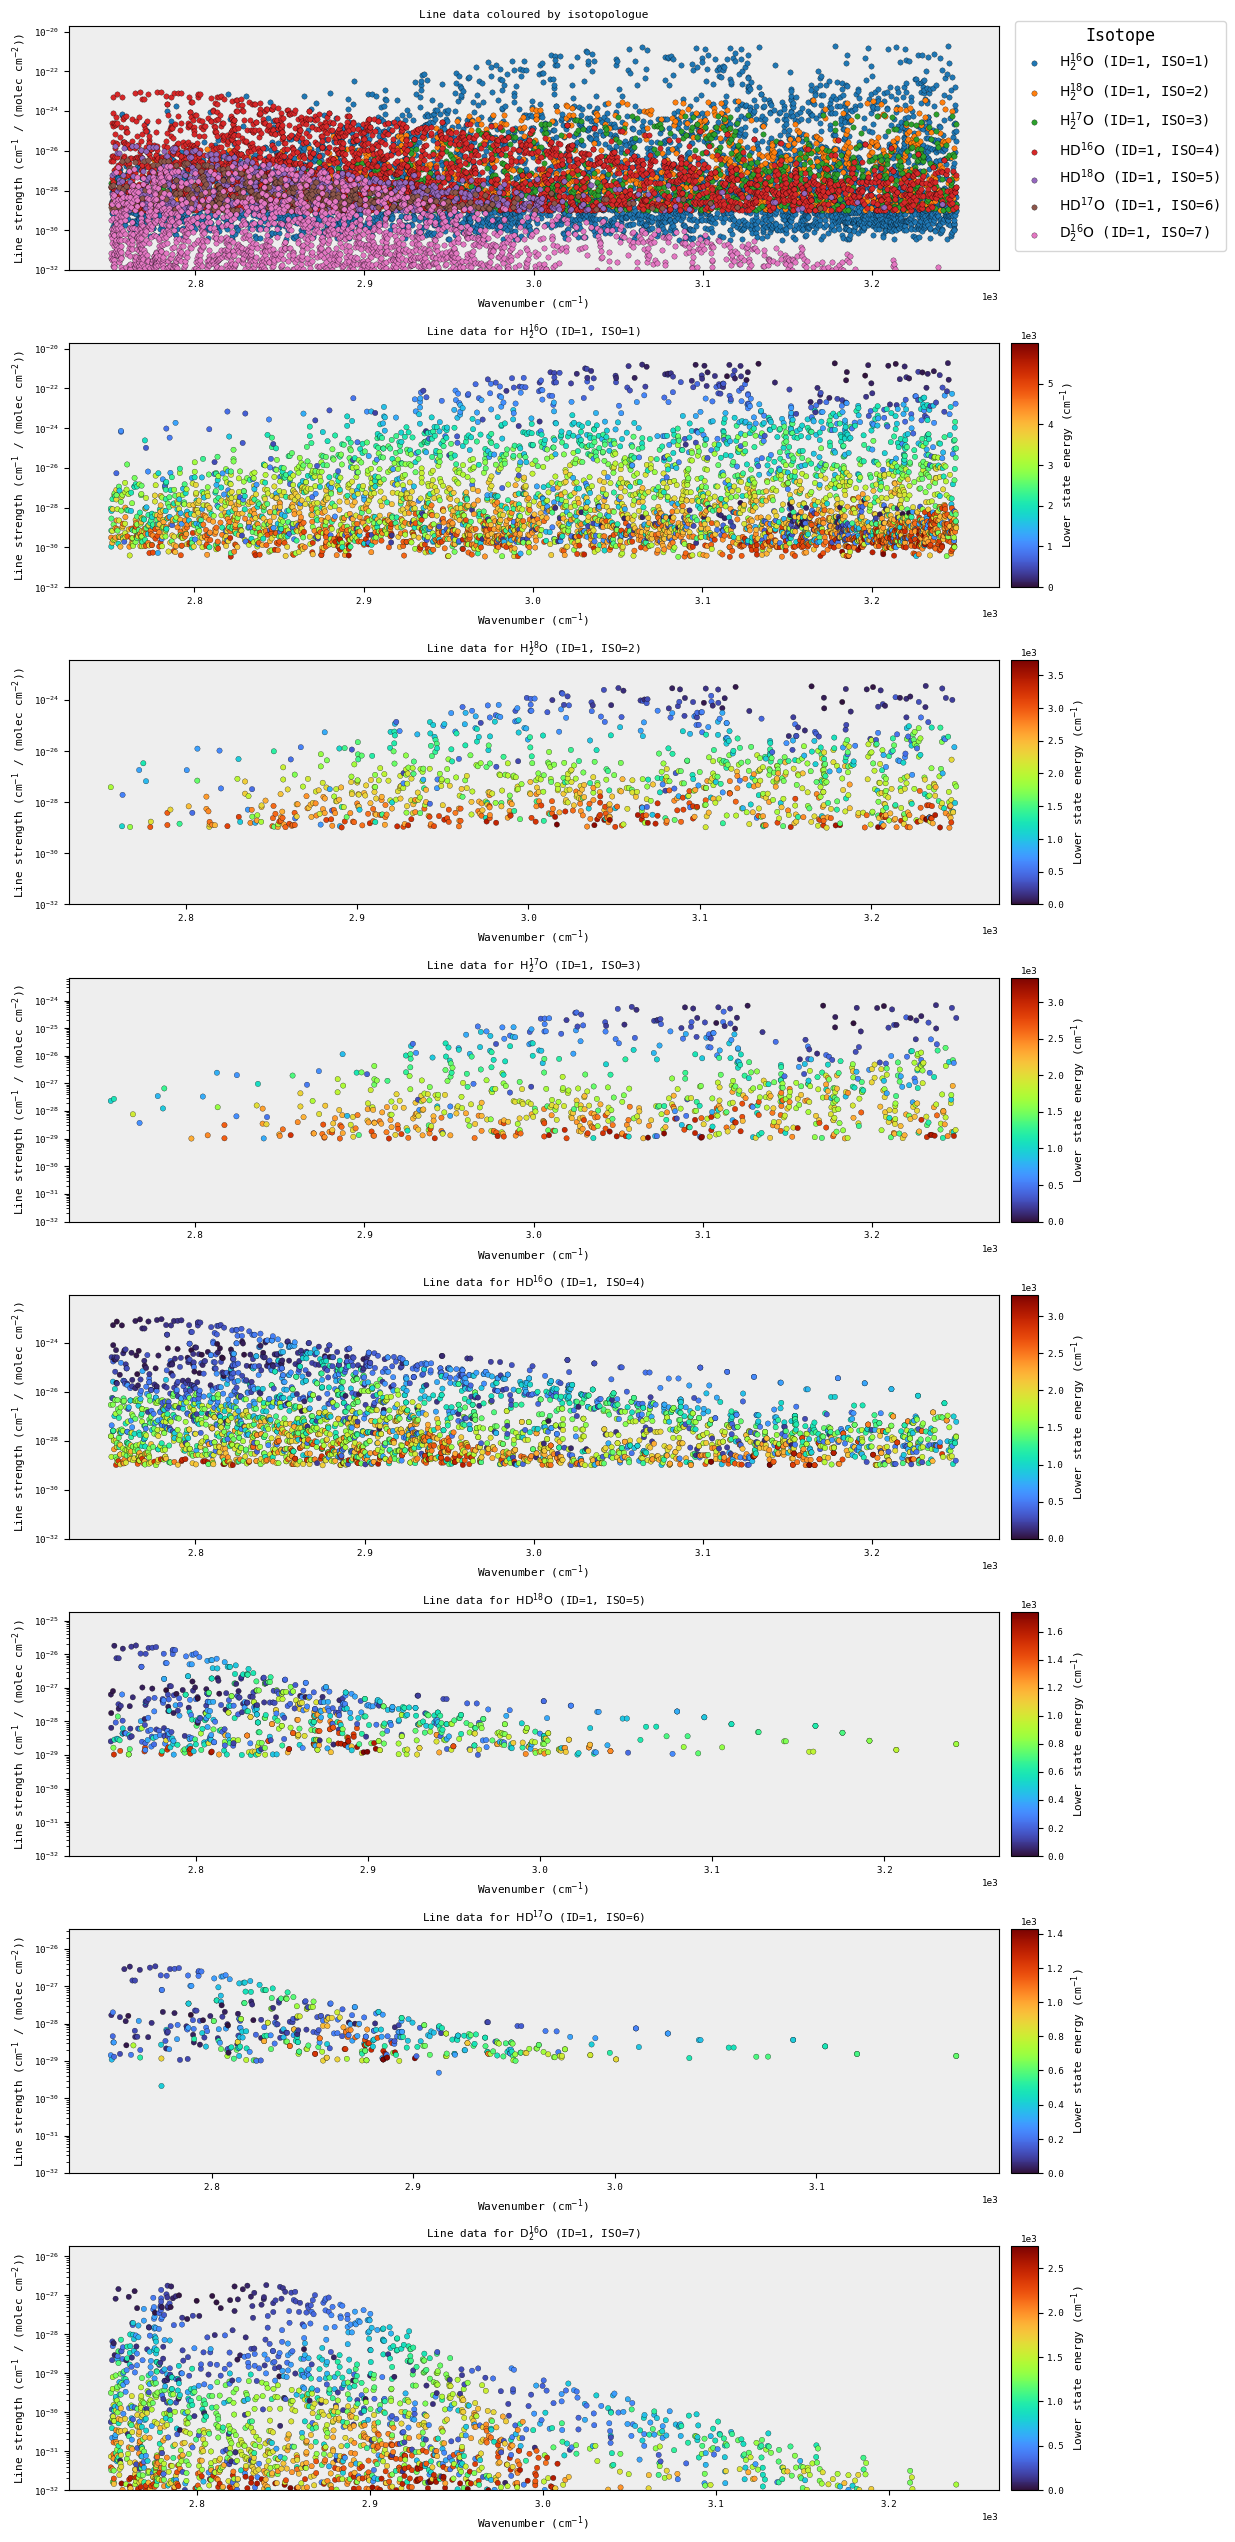

In [12]:
# Download line data for a different specified wavelength range
vmin = 2750 # wavenumber (cm^{-1})
vmax = 3250 # wavenumber (cm^{-1})

linedata.fetch_linedata(vmin, vmax)

# Download partition function tables for the gas isotopes
linedata.fetch_partition_function()

# Create new diagnotic plots
linedata.plot_linedata()

## 3. Multiple instances can use the same database

The `archnemesis.database.hitran.HITRAN` class keeps a record of what wavenumber ranges for which gas isotopes and ambient gas have been downloaded so re-requested data is not downloaded again (as much as that is possible). A database is also persistent on disk until it is purged, so it can be re-used in separate scripts and re-used between different `LineData_0` instances within the same script.

The following code shows how multiple `LineData_0` instances can use the same HITRAN database.

In [13]:
# HITRAN only: purge the previously created database as we want to change where it is stored.
linedata.LINE_DATABASE.purge()

shared_database_instance = HITRAN() # create a default database instance

# Create a new LineData_0 instances
ld_1 = ans.LineData_0(
	ans.enums.Gas.H2O, # Same gas
	1, # single isotope
	LINE_DATABASE = shared_database_instance,
)

# Create a new LineData_0 instances
ld_2 = ans.LineData_0(
	ans.enums.Gas.H2O, # Same gas
	(1,4), # multiple isotopes
	LINE_DATABASE = shared_database_instance,
)

INFO :: purge :: hitran.py-244 :: Database HITRAN(instance_id=126162836063808, local_storage_dir=/home/dobinsonl/repos/archnemesis-dist/docs/examples/linedata/local_non_default_line_database) has been purged. It no longer holds any local data and must be re-initialised using `self.init_database(...)`.
INFO :: retrieve_downloaded_gas_wavenumber_interval_from_cache :: hitran.py-289 :: Cache file for `self._downloaded_gas_wavenumber_interval` not found at cache_file_path='/home/dobinsonl/repos/archnemesis-dist/docs/examples/linedata/local_non_default_line_database/downloaded_gas_wavenumber_interval.pkl'. This is not a problem if the database is being built from scratch.
DEBUG :: init_database :: hitran.py-326 :: tablenames=[]
INFO :: init_database :: hitran.py-363 :: Database HITRAN(instance_id=126162854246432, local_storage_dir=/home/dobinsonl/repos/archnemesis-dist/docs/examples/linedata/local_non_default_line_database) initialised.
INFO :: PARTITION_FUNCTION_DATABASE :: LineData_0.py-2

In [14]:
# Fetch data for each of them, notice that the line data for H2O isotope 1 is only downloaded once as `ld_1` and `ld_2` share a database
ld_1.fetch_linedata(2000, 3000)
ld_1.fetch_partition_function()

ld_2.fetch_linedata(2200, 2800)
ld_2.fetch_partition_function()

DEBUG :: _fetch_line_data :: hitran.py-402 :: Downloaded gas data (RadtranGasDescriptor(gas_id=<Gas.H2O: 1>, iso_id=1), <AmbientGas.AIR: 0>) DOES NOT CONTAIN desired wave range None vs WaveRange(min=2000, max=3000, unit=<WaveUnit.Wavenumber_cm: 0>)
INFO :: _fetch_line_data :: hitran.py-407 :: Downloading data for (RadtranGasDescriptor(gas_id=<Gas.H2O: 1>, iso_id=1), <AmbientGas.AIR: 0>) where wave_range=WaveRange(min=2000, max=3000, unit=<WaveUnit.Wavenumber_cm: 0>) (saved_wave_range=None)...
DEBUG :: _fetch_line_data :: hitran.py-424 :: Fetching the following parameters from HITRAN: ('nu', 'sw', 'a', 'gamma_air', 'n_air', 'delta_air', 'gamma_self', 'n_self', 'elower', 'n_air')
INFO :: _fetch_line_data :: hitran.py-452 :: Data downloaded.
DEBUG :: store_downloaded_gas_wavenumber_interval_to_cache :: hitran.py-294 :: Caching self._downloaded_gas_wavenumber_interval={(RadtranGasDescriptor(gas_id=<Gas.H2O: 1>, iso_id=1), <AmbientGas.AIR: 0>): WaveRange(min=2000, max=3000, unit=<WaveUnit.W

DEBUG :: line_data_dict :: LineData_0.py-229 :: self.line_data.RT_GAS_DESC.dtype=dtype('int64')
DEBUG :: line_data_dict :: LineData_0.py-230 :: self.line_data.RT_GAS_DESC.shape=(6605, 2)
DEBUG :: line_data_dict :: LineData_0.py-231 :: self.line_data.RT_GAS_DESC=array([[1, 1],
       [1, 1],
       [1, 1],
       ...,
       [1, 1],
       [1, 1],
       [1, 1]])
DEBUG :: line_data_dict :: LineData_0.py-235 :: len(self.get_line_data_gas_desc_mask(rt_gas_desc))=6605
DEBUG :: line_data_dict :: LineData_0.py-236 :: type(self.get_line_data_gas_desc_mask(rt_gas_desc))=<class 'numpy.ndarray'>
DEBUG :: line_data_dict :: LineData_0.py-237 :: self.get_line_data_gas_desc_mask(rt_gas_desc).dtype=dtype('bool')
DEBUG :: line_data_dict :: LineData_0.py-238 :: np.count_nonzero(self.get_line_data_gas_desc_mask(rt_gas_desc))=6605
DEBUG :: line_data_dict :: LineData_0.py-229 :: self.line_data.RT_GAS_DESC.dtype=dtype('int64')
DEBUG :: line_data_dict :: LineData_0.py-230 :: self.line_data.RT_GAS_DESC.shape

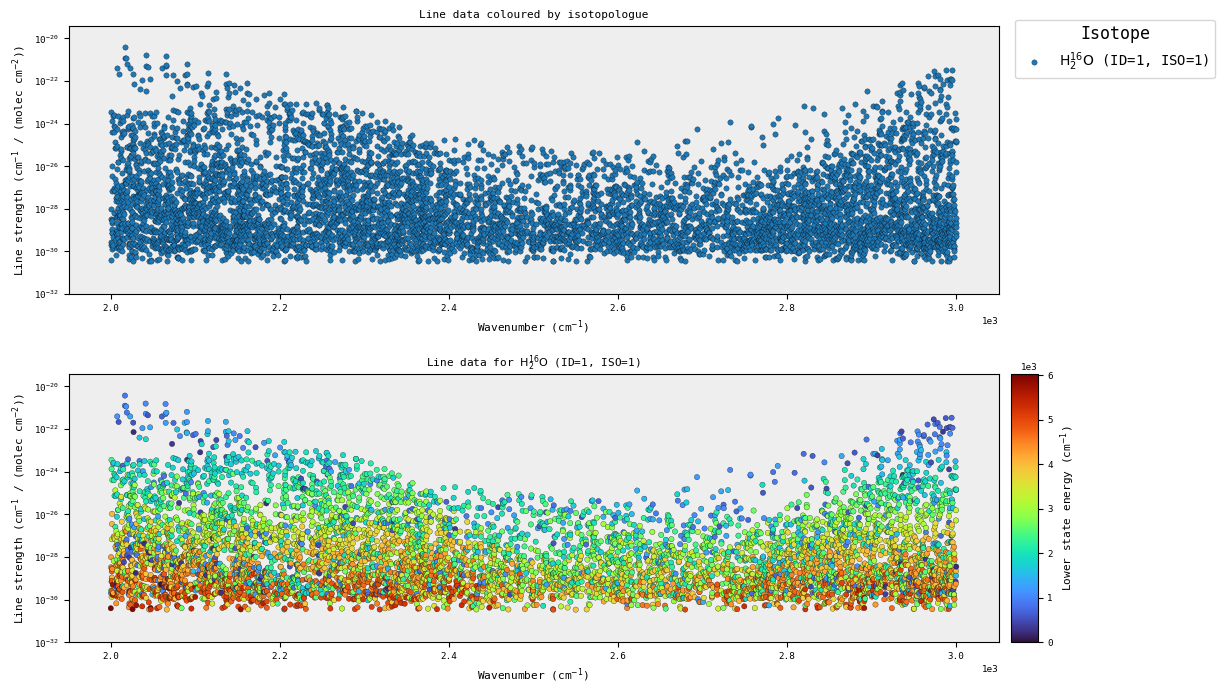

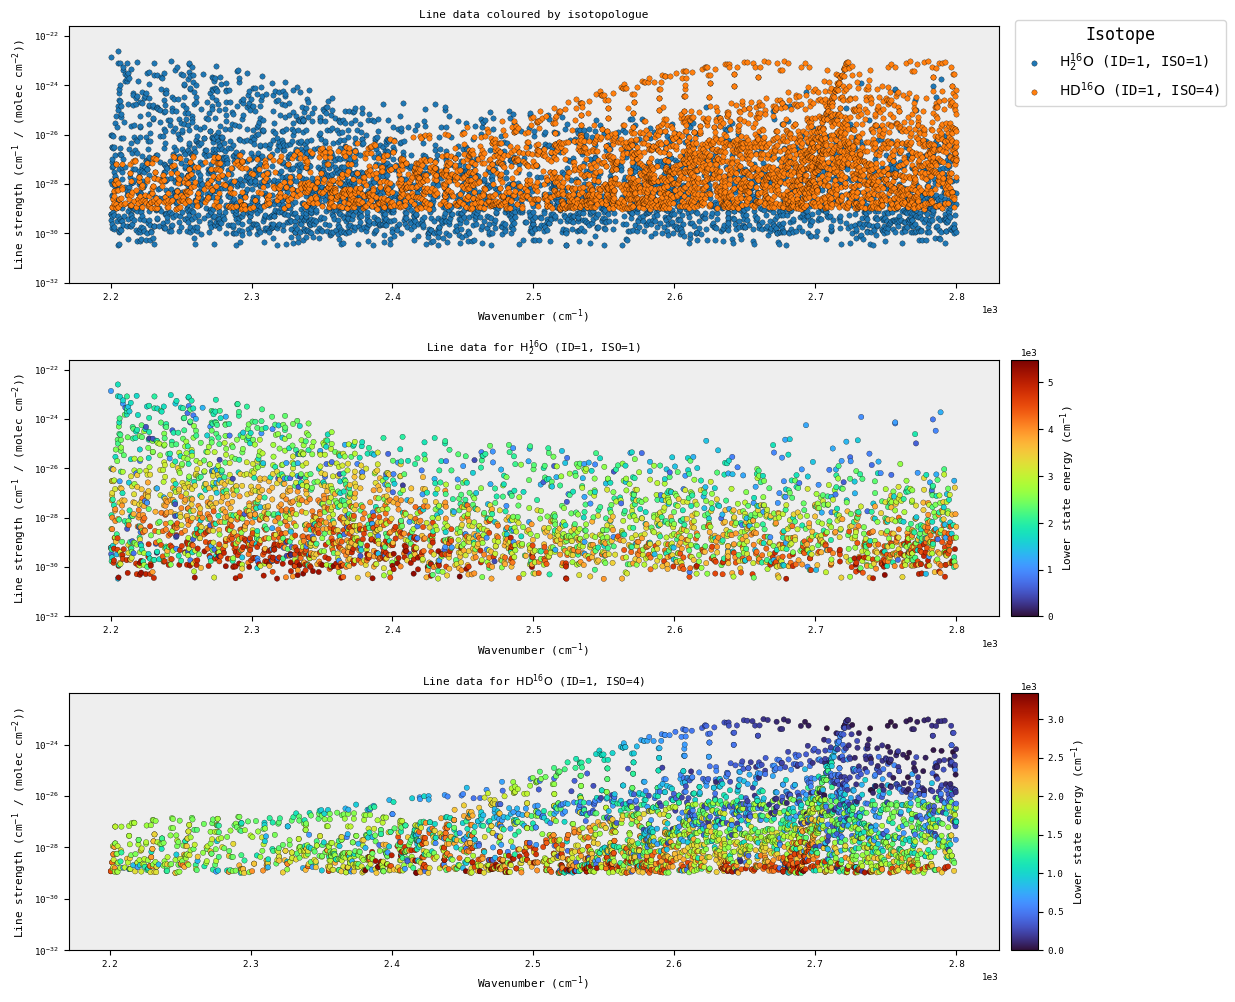

In [15]:
# Plot both of them
ld_1.plot_linedata()
ld_2.plot_linedata()

## 4. Existing databases are persistent unless purged

Unless a database is purged (either by manually deleting files or by calling `.purge()` on a database instance) they are persistent. You can pass an existing database instance to a new `LineData_0` instance to have it use a pre-existing database and/or set the `local_storage_dir` to the location of an existing database.

INFO :: PARTITION_FUNCTION_DATABASE :: LineData_0.py-207 :: Using default partition function database HITRAN(instance_id=126162579365120, local_storage_dir=None)
INFO :: PARTITION_FUNCTION_DATABASE :: LineData_0.py-207 :: Using default partition function database HITRAN(instance_id=126162579369200, local_storage_dir=None)
DEBUG :: _fetch_line_data :: hitran.py-402 :: Downloaded gas data (RadtranGasDescriptor(gas_id=<Gas.H2O: 1>, iso_id=4), <AmbientGas.AIR: 0>) DOES NOT CONTAIN desired wave range WaveRange(min=2200, max=2800, unit=<WaveUnit.Wavenumber_cm: 0>) vs WaveRange(min=2000, max=3000, unit=<WaveUnit.Wavenumber_cm: 0>)
INFO :: _fetch_line_data :: hitran.py-407 :: Downloading data for (RadtranGasDescriptor(gas_id=<Gas.H2O: 1>, iso_id=4), <AmbientGas.AIR: 0>) where wave_range=WaveRange(min=2000, max=3000, unit=<WaveUnit.Wavenumber_cm: 0>) (saved_wave_range=WaveRange(min=2200, max=2800, unit=<WaveUnit.Wavenumber_cm: 0>))...
DEBUG :: _fetch_line_data :: hitran.py-424 :: Fetching the f

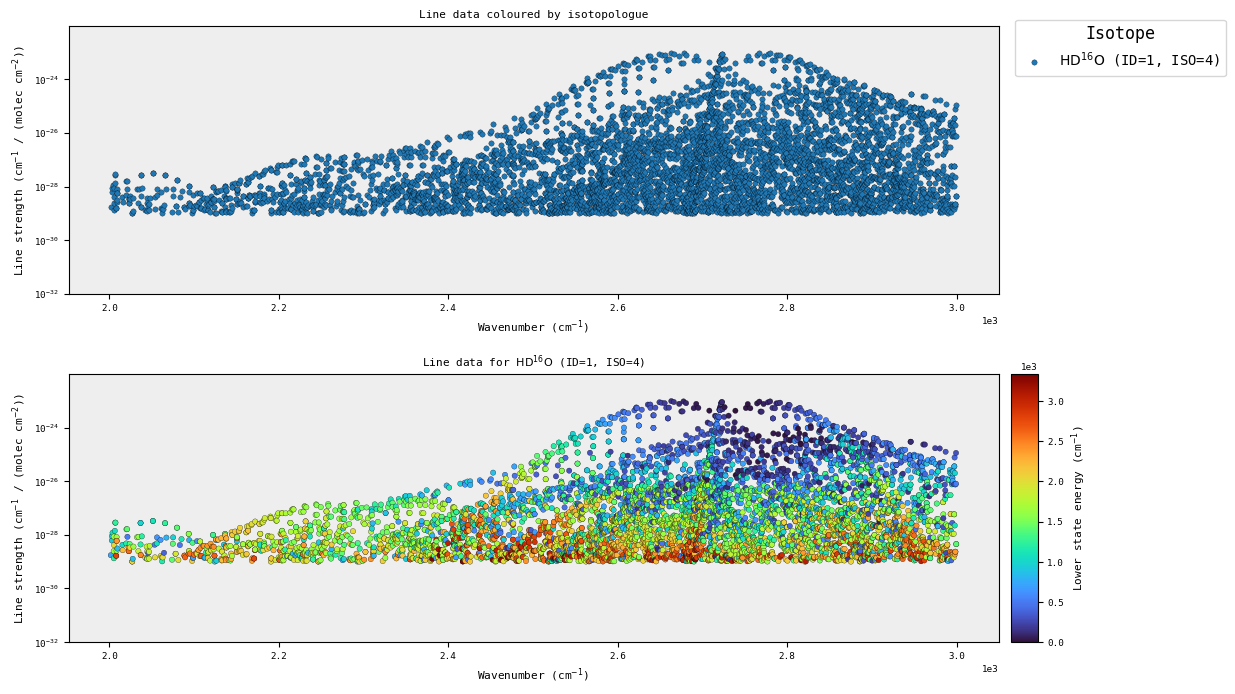

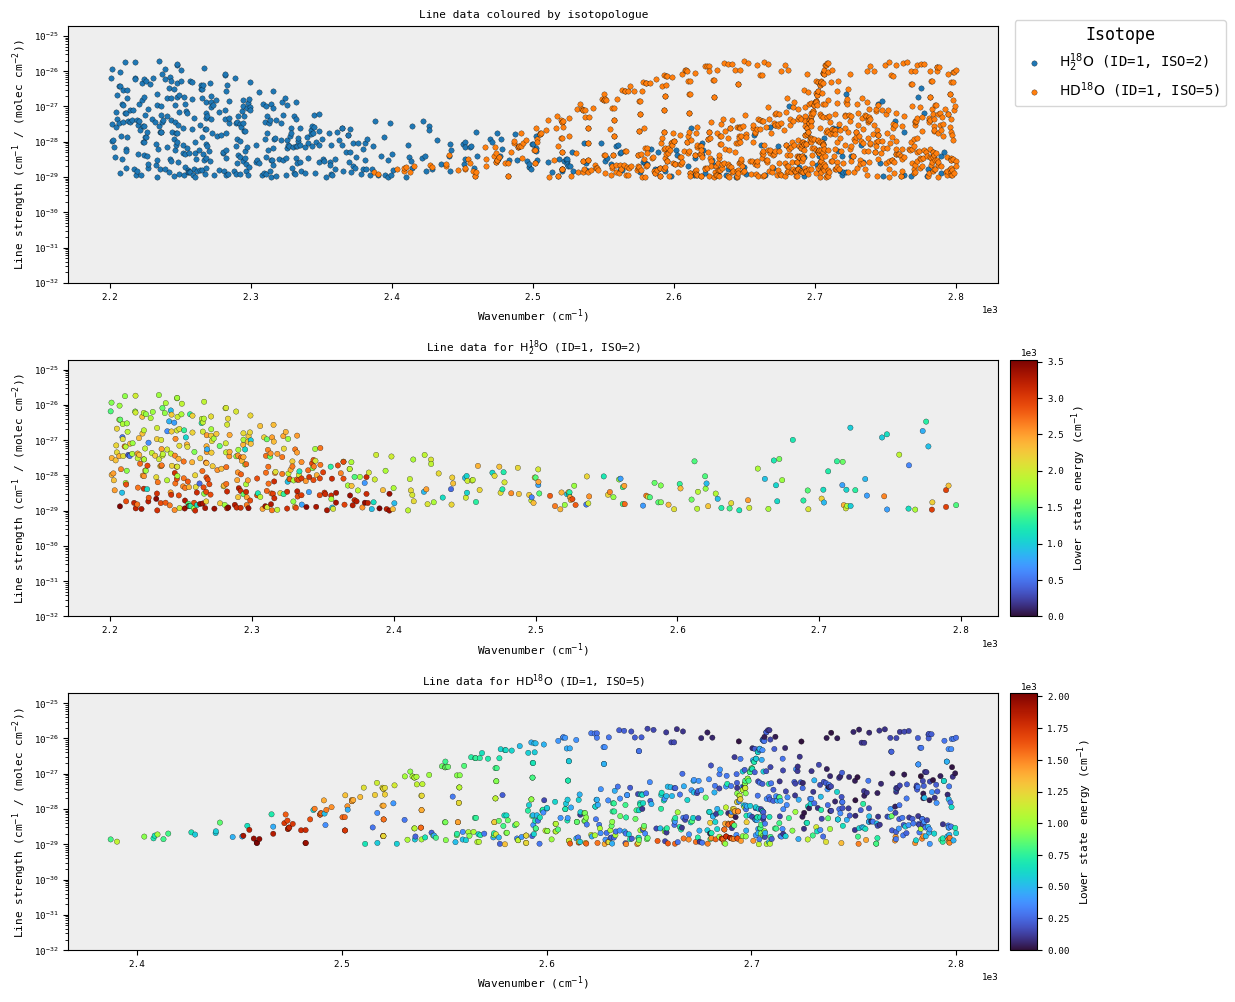

In [16]:
# NOTE: not purging the previously created database as we want to re-use it


# Create a new LineData_0 instance with the same database instance as a previous LineData_0
ld_3 = ans.LineData_0(
	ans.enums.Gas.H2O, # Same gas
	4, # single isotope
	LINE_DATABASE = ld_1.LINE_DATABASE
)

# Create a new LineData_0 instance with a database instance explicity targeted at the same location
ld_4 = ans.LineData_0(
	ans.enums.Gas.H2O, # Same gas
	(2,5), # multiple isotopes
	LINE_DATABASE=HITRAN('local_line_database'), # same location as default HITRAN database
)

# Fetch data for each of them
ld_3.fetch_linedata(2000, 3000)
ld_3.fetch_partition_function()

ld_4.fetch_linedata(2200, 2800)
ld_4.fetch_partition_function()

# Plot both of them
ld_3.plot_linedata()
ld_4.plot_linedata()

## 5. Performing calculations with the line data

Once the line data has been read, users may perform calculations using the attributes of the LineData class. Some methods are built-in within the class, but users may also define their own custom functions using the attributes of the class.

Here, we provide an example of how to calculate the line strenghts at arbitrary temperatures using the *calculate_line_strength()* method. This method can be used to evaluate which transitions are more or less temperature-dependent.

DEBUG :: line_data_dict :: LineData_0.py-229 :: self.line_data.RT_GAS_DESC.dtype=dtype('int64')
DEBUG :: line_data_dict :: LineData_0.py-230 :: self.line_data.RT_GAS_DESC.shape=(1425, 2)
DEBUG :: line_data_dict :: LineData_0.py-231 :: self.line_data.RT_GAS_DESC=array([[1, 2],
       [1, 2],
       [1, 2],
       ...,
       [1, 5],
       [1, 5],
       [1, 5]])
DEBUG :: line_data_dict :: LineData_0.py-235 :: len(self.get_line_data_gas_desc_mask(rt_gas_desc))=1425
DEBUG :: line_data_dict :: LineData_0.py-236 :: type(self.get_line_data_gas_desc_mask(rt_gas_desc))=<class 'numpy.ndarray'>
DEBUG :: line_data_dict :: LineData_0.py-237 :: self.get_line_data_gas_desc_mask(rt_gas_desc).dtype=dtype('bool')
DEBUG :: line_data_dict :: LineData_0.py-238 :: np.count_nonzero(self.get_line_data_gas_desc_mask(rt_gas_desc))=529
DEBUG :: line_data_dict :: LineData_0.py-235 :: len(self.get_line_data_gas_desc_mask(rt_gas_desc))=1425
DEBUG :: line_data_dict :: LineData_0.py-236 :: type(self.get_line_data_g

DEBUG :: line_data_dict :: LineData_0.py-237 :: self.get_line_data_gas_desc_mask(rt_gas_desc).dtype=dtype('bool')
DEBUG :: line_data_dict :: LineData_0.py-238 :: np.count_nonzero(self.get_line_data_gas_desc_mask(rt_gas_desc))=529
DEBUG :: line_data_dict :: LineData_0.py-235 :: len(self.get_line_data_gas_desc_mask(rt_gas_desc))=1425
DEBUG :: line_data_dict :: LineData_0.py-236 :: type(self.get_line_data_gas_desc_mask(rt_gas_desc))=<class 'numpy.ndarray'>
DEBUG :: line_data_dict :: LineData_0.py-237 :: self.get_line_data_gas_desc_mask(rt_gas_desc).dtype=dtype('bool')
DEBUG :: line_data_dict :: LineData_0.py-238 :: np.count_nonzero(self.get_line_data_gas_desc_mask(rt_gas_desc))=896
DEBUG :: partition_data_dict :: LineData_0.py-251 :: self.partition_data.RT_GAS_DESC.dtype=dtype('int64')
DEBUG :: partition_data_dict :: LineData_0.py-252 :: self.partition_data.RT_GAS_DESC.shape=(1002, 2)
DEBUG :: partition_data_dict :: LineData_0.py-253 :: self.partition_data.RT_GAS_DESC=array([[1, 2],
     

ld_4.line_data_dict.keys()=dict_keys([RadtranGasDescriptor(gas_id=<Gas.H2O: 1>, iso_id=2), RadtranGasDescriptor(gas_id=<Gas.H2O: 1>, iso_id=5)])
[x.size for x in ld_4.line_data_dict.values()]=[529, 896]
sw_mask.shape=(529,)
nu.shape=(25,)
x.shape=(25,)
sw_mask.shape=(896,)
nu.shape=(80,)
x.shape=(80,)
sw_mask.shape=(529,)
nu.shape=(25,)
x.shape=(25,)
sw_mask.shape=(896,)
nu.shape=(80,)
x.shape=(80,)
sw_mask.shape=(529,)
nu.shape=(25,)
x.shape=(25,)
sw_mask.shape=(896,)
nu.shape=(80,)
x.shape=(80,)
sw_mask.shape=(529,)
nu.shape=(25,)
x.shape=(25,)
sw_mask.shape=(896,)
nu.shape=(80,)
x.shape=(80,)
sw_mask.shape=(529,)
nu.shape=(25,)
x.shape=(25,)
sw_mask.shape=(896,)
nu.shape=(80,)
x.shape=(80,)


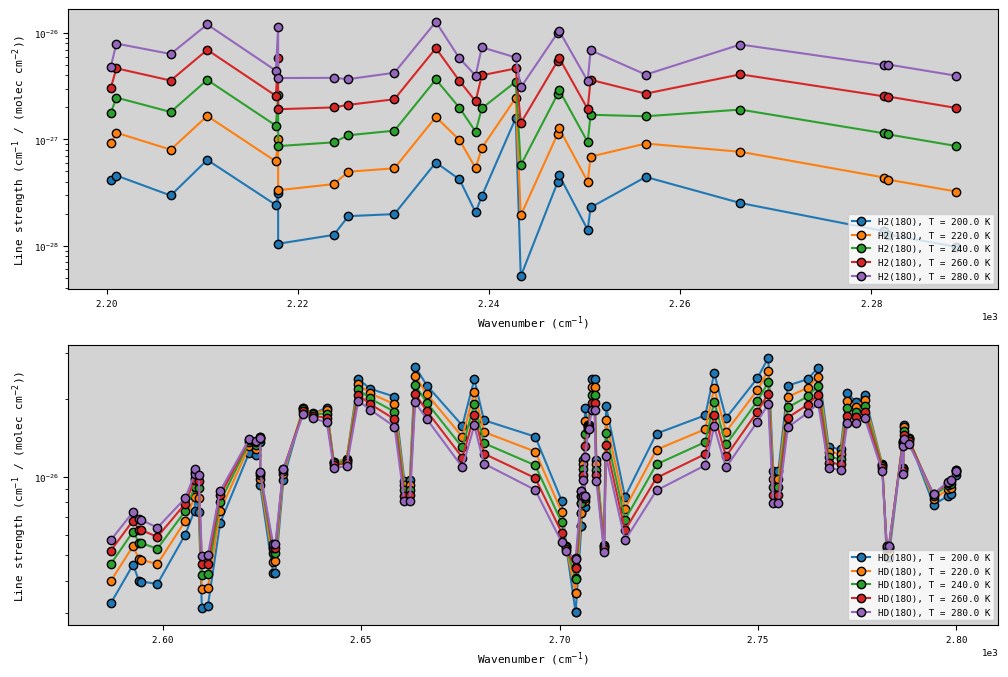

In [18]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots(2,1,figsize=(12,8))
psize = 5.
swlim = 5.0e-27

temps = [200.,220.,240.,260.,280.]

print(f'{ld_4.line_data_dict.keys()=}')
print(f'{[x.size for x in ld_4.line_data_dict.values()]=}')

for i, temp in enumerate(temps):
    ls = ld_4.calculate_line_strength(temp)
    for j, (gas_desc, gas_line_data) in enumerate(ld_4.line_data_dict.items()):
        sw_mask = gas_line_data.SW > swlim
        nu = gas_line_data.NU[sw_mask]
        x = ls[ld_4.get_line_data_gas_desc_mask(gas_desc)][sw_mask]
        
        print(f'{sw_mask.shape=}')
        print(f'{nu.shape=}')
        print(f'{x.shape=}')
        
        ax[j].plot(
            nu,
            x,
            marker='o',
            markeredgecolor='black',
            label=f'{gas_desc.isotope_name}, T = '+str(temp)+' K'
        )

for i in range(ax.size):
    ax[i].legend(loc='lower right')
    ax[i].set_yscale('log')
    ax[i].set_xlabel('Wavenumber (cm$^{-1}$)')
    ax[i].set_ylabel('Line strength (cm$^{-1}$ / (molec cm$^{-2}$))')
    ax[i].set_facecolor('lightgray')